In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = np.genfromtxt('cvpr_dataset.csv', delimiter=',', skip_header=1)
X = data[:, :2]  # First two columns are features
Y = data[:, 2:3]  # Third column is output


In [4]:
print(f"Data loaded: {X.shape[0]} samples")

Data loaded: 500 samples


In [5]:
class ThreeLayerNeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hidden1LayerNeurons = 8
        hidden2LayerNeurons = 6
        outLayerNeurons = 1

        self.learning_rate = 0.1
        self.W1 = np.random.randn(inputLayerNeurons, hidden1LayerNeurons)
        self.W2 = np.random.randn(hidden1LayerNeurons, hidden2LayerNeurons)
        self.W3 = np.random.randn(hidden2LayerNeurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        # Input to Hidden1
        self.hidden1_input = np.dot(X, self.W1)
        self.hidden1_output = self.sigmoid(self.hidden1_input)

        # Hidden1 to Hidden2
        self.hidden2_input = np.dot(self.hidden1_output, self.W2)
        self.hidden2_output = self.sigmoid(self.hidden2_input)

        # Hidden2 to Output
        output_input = np.dot(self.hidden2_output, self.W3)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        # Output layer error
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        # Hidden2 layer error
        hidden2_error = output_delta.dot(self.W3.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        # Hidden1 layer error
        hidden1_error = hidden2_delta.dot(self.W2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        # Update weights
        self.W3 += self.hidden2_output.T.dot(output_delta)
        self.W2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W1 += X.T.dot(hidden1_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


In [6]:
NN = ThreeLayerNeuralNetwork()

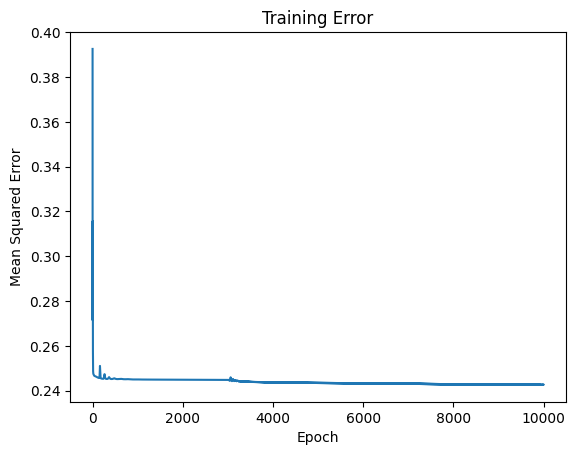

In [7]:
err = []
for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

# Plot error
plt.plot(err)
plt.title('Training Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

In [9]:
print("\nTesting predictions:")
test_points = [
    [76, 6],    # Should be 1
    [45, 90],   # Should be 0
    [47, 11],   # Should be 1
    [35, 70]    # Should be 0
]

for point in test_points:
    prediction = NN.feedForward([point])
    print(f"Input: {point} -> Prediction: {prediction[0][0]:.4f} (expected: {point[0]})")



Testing predictions:
Input: [76, 6] -> Prediction: 0.5060 (expected: 76)
Input: [45, 90] -> Prediction: 0.5368 (expected: 45)
Input: [47, 11] -> Prediction: 0.4782 (expected: 47)
Input: [35, 70] -> Prediction: 0.5352 (expected: 35)


In [10]:
predictions = NN.feedForward(X)
predicted_classes = (predictions > 0.5).astype(int)
accuracy = np.mean(predicted_classes == Y)
print(f"\nFinal Accuracy: {accuracy:.4f}")


Final Accuracy: 0.5640
